In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
## Input Data
# Mean Vector - in 2 dimensional setting
mean_01 = [1.0, 0.5]
mean_02 = [6.0, 7.0]

# Covariance Matrices - Measure of Variability about mean
cov_01 = [[1.0, 0.1], [0.1, 1.2]]
cov_02 = [[1.0, 0.1], [0.1, 1.0]]

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape

(500, 2)


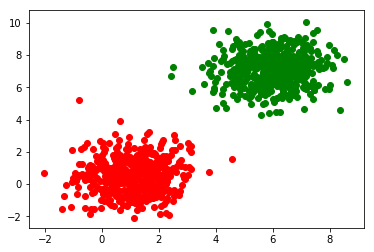

In [28]:
plt.scatter(dist_01[:, 0], dist_01[:, 1], c='red')
#plt.show()
plt.scatter(dist_02[:, 0], dist_02[:, 1], c='green')
plt.show()

In [29]:
# data matrix definition
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows, cols))
data[:dist_01.shape[0], :2] = dist_01
data[:dist_01.shape[0], -1] = 0.0

data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] = 1.0
print data.shape
print np.max(data)

(1000, 3)
10.0418041706


In [30]:
np.random.shuffle(data)
print data[:10]

[[ 6.7429809   7.89761027  1.        ]
 [ 4.85293648  7.0689495   1.        ]
 [ 6.83926812  8.78158237  1.        ]
 [ 2.29520886  0.95053722  0.        ]
 [ 3.11927276  0.90988611  0.        ]
 [ 6.44346178  9.07064697  1.        ]
 [ 2.35362224 -0.47215398  0.        ]
 [ 2.87353254  0.38703813  0.        ]
 [ 4.64183262  6.71494497  1.        ]
 [ 1.49275726  2.76378223  0.        ]]


In [33]:
## Distance Function
def distance_euclid(pt1, pt2):
    d = np.sqrt(((pt1-pt2)**2).sum())
    return d
print distance_euclid(np.array([0.0, 0.0]), np.array([1.0, 1.0]))

## Manhattan Distance Function
def distance_manhat(pt1, pt2):
    d = abs((pt1-pt2).sum())
    return d

print distance_manhat(np.array([1.0, 1.0]), np.array([0.0, 0.0]))

1.41421356237
2.0


In [42]:
pt1 = np.array([0.0, 0.0])
pt2 = np.array([1.0, 1.0])
dist = 0
for ix in range(pt1.shape[0]):
    val = (pt1[ix] - pt2[ix])**2
    dist+=val
dist = np.sqrt(dist)
print dist

1.41421356237


In [49]:
## Testing and Training Split of the dataset
split = int(0.60*data.shape[0])
print split

train_x = data[:split, :2]
train_y = data[:split, -1]

test_x = data[split:, :2]
test_y = data[split:, -1]

print train_x.shape
print test_x.shape

#print np.unique(train_y, return_counts=True)
#print np.unique(test_y, return_counts=True)

print '------------'
freq = np.unique(train_y, return_counts=True)
print freq
print freq[0]
print freq[1]

print freq[1].max()
print freq[1].argmax()

ans = freq[0][freq[1].argmax()]
print ans

600
(600, 2)
(400, 2)
------------
(array([ 0.,  1.]), array([313, 287]))
[ 0.  1.]
[313 287]
313
0
0.0


In [78]:
def KNN(train_x, train_y, test_pt, k=5):
    vals = []
    for ix in range(train_x.shape[0]):
        d = distance_euclid(train_x[ix], test_pt)
        #d = distance_manhat(train_x[ix], test_pt)
        vals.append([d, train_y[ix]])
    
    sorted_vals = sorted(vals, key=lambda r:r[0])
    sorted_vals = np.array(sorted_vals)[:k]
    labels = sorted_vals[:,-1]
    freq = np.unique(labels, return_counts=True)
    ans = freq[0][freq[1].argmax()]
    
    return ans

In [79]:
test_pt1 = np.array([4.0, 4.5])
ans = KNN(train_x,train_y, test_pt1, k=5)
print ans

1.0


In [80]:
def get_acc(train_x, train_y, test_x, test_y, kx=5):
    preds = []
    for ix in range(test_x.shape[0]):
        p = KNN(train_x, train_y, test_x[ix], k=kx)
        preds.append(p)
    preds = np.array(preds)
    
    res = np.array(preds==test_y)
    print res.shape
    acc = 100*float((preds==test_y).sum())/test_y.shape[0]
    return acc

In [81]:
print get_acc(train_x, train_y, test_x, test_y, kx=5)

(400,)
100.0


In [82]:
import pandas as pd

In [83]:
fash_ds = pd.read_csv('/home/ayush/Documents/fashion-mnist_train.csv')
fashion_data = fash_ds.values
print fashion_data.shape

fash_ds.tail(n=3)

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(785,)
3


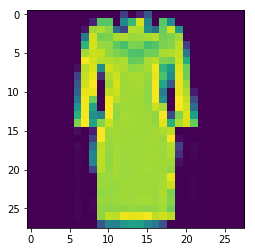

In [64]:
img_data = fashion_data[4]
print img_data.shape
label = img_data[0]
img = img_data[1:].reshape((28, 28))
print label
plt.imshow(img)
plt.show()

In [84]:
## Test Train Split
fash_data = fashion_data[:3000]

split = int(0.60*fash_data.shape[0])
print split

fashion_train_x = fash_data[:split, 1:]
fashion_train_y = fash_data[:split, 0]
fashion_test_x = fash_data[split:, 1:]
fashion_test_y = fash_data[split:, 0]

print fashion_train_x.shape

1800
(1800, 784)


In [85]:
print get_acc(fashion_train_x, fashion_train_y, fashion_test_x, fashion_test_y, kx=5)

(1200,)
79.9166666667


In [77]:
print get_acc(fashion_train_x, fashion_train_y, fashion_test_x, fashion_test_y, kx=5)

(1200,)
19.9166666667


In [68]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

In [72]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(fashion_train_x, fashion_train_y)
print 100*neigh.score(fashion_test_x, fashion_test_y)

79.9166666667
